In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.0.0


In [2]:
# Check for GPU
!nvidia-smi

Mon Aug 21 13:39:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 Ti   WDDM  | 00000000:06:00.0  On |                  N/A |
|  0%   49C    P8              21W / 290W |   1213MiB /  8192MiB |     25%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 1. What are 3 areas in industry where computer vision is currently being used?

1- Autonomous Vehicles

2- Healthcare

3- Retail and E-commerce


### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find

It is to analyze a data too exactly that it may prevent future predictions and therefore unnecessary (that is the first thing that i understood from a 5 minute google search)

### 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [3]:
import torch 
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 

from tqdm import tqdm


device="cuda" if torch.cuda.is_available() else "cpu"

print(torch.__version__)
print(torchvision.__version__)

2.0.0
0.15.0


In [4]:
train_data=datasets.FashionMNIST(root="data",
                                 train=True,
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None)

test_data=datasets.FashionMNIST(root="data",
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

len(train_data),len(test_data)

(60000, 10000)

In [5]:
from helper_functions import train_step,test_step,eval_model,accuracy_fn,set_seeds,print_train_time

In [6]:
from torch.utils.data import DataLoader

image,label=train_data[0]
class_names=train_data.classes
class_to_idx=train_data.class_to_idx

BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [7]:
torch.manual_seed(42)

class ExerciseModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int,):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
        #Final layer (classifier layer)
        self.classifier_layer=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*49,#to be completed 
                      out_features=output_shape)

        )
    def forward(self,x:torch.tensor):
        x=self.conv_block_1(x)
        x=self.conv_block_2(x)
        x=self.classifier_layer(x)
        return x

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


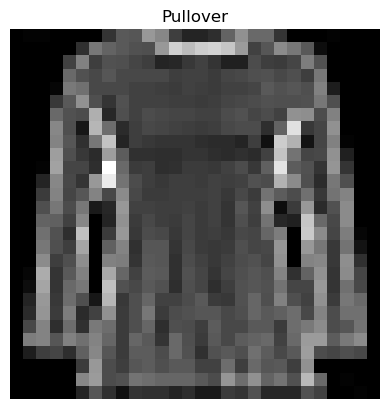

In [8]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))

random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()

img=train_features_batch[random_idx]
label=train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.axis(False)
plt.title(class_names[label])
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [9]:
torch.manual_seed(42)

model_1=ExerciseModelV1(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)


In [10]:
set_seeds()

from timeit import default_timer as timer 

train_start_time_model_1=timer()

epochs=5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch+1}\n------------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_end_time_model_1=timer()

total_train_time_model_1=print_train_time(start=train_start_time_model_1,
                                          end=train_end_time_model_1,
                                          device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
------------
Train loss: 0.59519 | Train acc: 78.36%


 20%|██        | 1/5 [00:16<01:04, 16.25s/it]


Test loss: 0.3899, Test acc 86.3319
Epoch: 2
------------
Train loss: 0.36261 | Train acc: 87.02%


 40%|████      | 2/5 [00:25<00:36, 12.19s/it]


Test loss: 0.3593, Test acc 86.5715
Epoch: 3
------------
Train loss: 0.32727 | Train acc: 88.11%


 60%|██████    | 3/5 [00:35<00:22, 11.07s/it]


Test loss: 0.3182, Test acc 88.5383
Epoch: 4
------------
Train loss: 0.30726 | Train acc: 88.80%


 80%|████████  | 4/5 [00:45<00:10, 10.58s/it]


Test loss: 0.3324, Test acc 87.7696
Epoch: 5
------------
Train loss: 0.29344 | Train acc: 89.38%


100%|██████████| 5/5 [00:54<00:00, 10.84s/it]


Test loss: 0.3202, Test acc 88.6681

Train time on cuda: 54.229 seconds


In [11]:
from helper_functions import eval_model
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 316.99it/s]


{'model_name': 'ExerciseModelV1',
 'model_loss': 0.32021450996398926,
 'model_acc': 88.66813099041534}